# **MÓDULO 32 - Exercício**
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importações para balanceamento + pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold


In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

- Verificação dos tipos de dados e se há valores faltantes e correção dos tipos.

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observação: Após a verificação foi possível ver que não há valores faltantes. E os tipos estão corretos

# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


- Verificando se há outliers e a distribuição dos dados.

In [4]:
df.describe()

# Pela função describe não foi possível ver nenhuma tendencia forte de categoria com outliers. Mas farei uma verificação extras nas categorias: "residual sugar", "chlorides" e "total sulfur dioxide"

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Residual sugar

In [5]:
# Boxplot da categoria "residual sugar"

px.box(
    df,
    "residual sugar"
)

# Remoção dos outliers

cond = df["residual sugar"] > 7.2
df = df[~cond]

# Verificando remoção dos outliers

px.box(
    df,
    "residual sugar"
)

Observação: Com o gráfico, ficou claro que há sim outliers, valores que 3 vezes maiores que o valor do do quandrante superior... É claro que é possível que existam vinho bem doces, mas valores tão altos assim dificilmente ajudariam o modelo, na verdade, aumentaria chances de viés, logo decidi fazer a remoção de valores que sejam duas 2x vezes maiores que os valore do quadrante superior visando evitar vies no modelo, sem desconciderar os vinhos que são mais doces.

Chlorides

In [6]:
# Bloxplot da categoria "chlorides"

px.box(
    df,
    "chlorides"\
)

# Remoção dos outliers

cond = df["chlorides"] > 0.24
df = df[~cond]

# Verificação da remoção

px.box(
    df,
    "chlorides"
)

Observação: também há forte indício de outliers, e os tratarei da mesma forma que o outro, removeirei todos os valores que forem 2 vezes maiores que o quadrante superior.

total sulfur dioxide

In [7]:
# Boxplot da categoria "total sulfur dioxide"

px.box(
    df,
    "total sulfur dioxide"
)

Observação: Há valores altos e que passam dos quadrantes superiores mas não irei remove-los pois utilizando a mesma regra que utilizei nos otros eles não chegam a ser duas vezes maiores que o quadrante superior, e remove-los pode significar a remoção de vinhos exóticos de forma injusta, logo, os manterei.

- Verificando balanceamento da variável target.

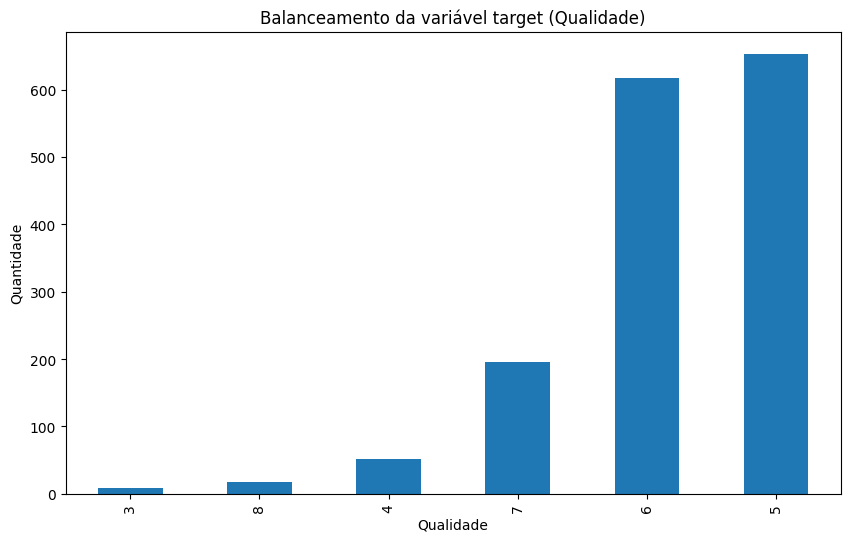

In [8]:
countquality = df["quality"].value_counts().sort_values()

plt.figure(figsize=(10,6))
countquality.plot(kind="bar")
plt.title("Balanceamento da variável target (Qualidade)")
plt.xlabel("Qualidade")
plt.ylabel("Quantidade")
plt.show()


Observação: Com o gráfico foi possível que a váriavel target está bem desbalanceada!

- Matriz de corr para verificar a correlação das variáveis

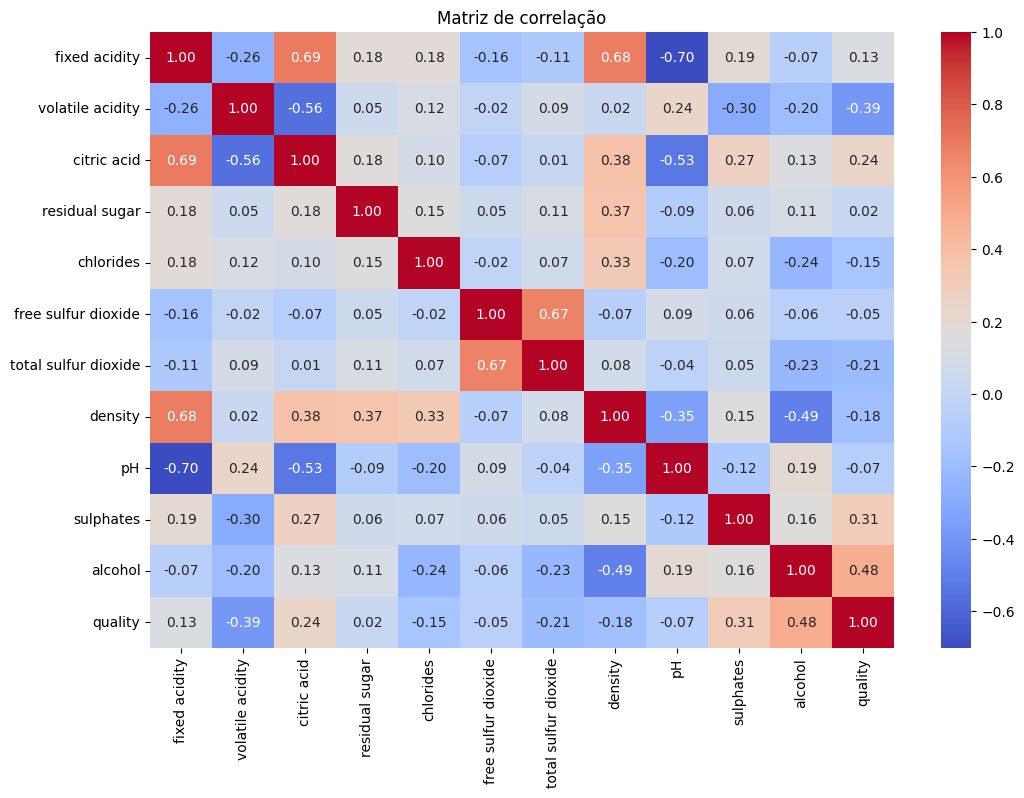

In [9]:
matriz_corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size":10})
plt.title("Matriz de correlação")
plt.show()

Observação: De acordo com a matriz de correleção foi possível ver que as variáveis que mais se relacionam com a variável alvo são: 'volatile acidity', 'sulphates' e 'alcohol'

- Criando df com mais corr

In [10]:
df20 = df[['quality', 'alcohol', 'volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates']]

# Verificando se o novo df está correto

df20.describe()

,quality,alcohol,volatile acidity,citric acid,total sulfur dioxide,sulphates
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,5.642903,10.441380,0.528088,0.265787,45.515878,0.650778
std,0.808611,1.058722,0.179544,0.191783,31.499561,0.154603
min,3.000000,8.400000,0.120000,0.000000,6.000000,0.330000
25%,5.000000,9.500000,0.390000,0.090000,22.000000,0.550000
50%,6.000000,10.200000,0.520000,0.250000,37.000000,0.620000
75%,6.000000,11.100000,0.640000,0.420000,60.000000,0.720000
max,8.000000,14.000000,1.580000,0.790000,165.000000,1.980000


Observação: Para escolher quais categorias iriam entrar dnesse df, eu criei uma regra, e nessa regra, apenas as categorias que tiver corr 0.2+ ou 0.2- em relação a variável target serão utilizadas. Nesse caso, as categorias usadas foram: "volatile acidity", "citric acid", "total sulfur dioxide", "sulphates", "alcohol" e obviamente a categoria target que não poderia faltar.

# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


- Dividindo em X e em y

In [11]:
X = df20.drop('quality', axis=1)
y = df20['quality']

# Verificando se a seperação deu certo

print(X)
print(y)

      alcohol  volatile acidity  citric acid  total sulfur dioxide  sulphates
0         9.4             0.700         0.00                  34.0       0.56
1         9.8             0.880         0.00                  67.0       0.68
2         9.8             0.760         0.04                  54.0       0.65
3         9.8             0.280         0.56                  60.0       0.58
4         9.4             0.700         0.00                  34.0       0.56
...       ...               ...          ...                   ...        ...
1594     10.5             0.600         0.08                  44.0       0.58
1595     11.2             0.550         0.10                  51.0       0.76
1596     11.0             0.510         0.13                  40.0       0.75
1597     10.2             0.645         0.12                  44.0       0.71
1598     11.0             0.310         0.47                  42.0       0.66

[1543 rows x 5 columns]
0       5
1       5
2       5
3       6

- Separando em treino e teste

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=48)

# Verificando se a separação funcionou

print("X Train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ",y_train.shape)
print("y test", y_test.shape)

X Train:  (1234, 5)
X test:  (309, 5)
y train:  (1234,)
y test (309,)


# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


- Criando modelo e treinando ele

In [13]:
# Criando modelo

rf_model = RandomForestClassifier(random_state=48)

# Treinando modelo

rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


- Aplicando a base teste

In [14]:
y_pred = rf_model.predict(X_test)

# 5 - Avaliação

A) Avalie as principais métricas da Claissificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.


- Avaliando modelo

In [15]:
# Pegando as métricas para fazer a avaliação

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

# Colocando labels na matriz de confusão para entender melhor o resultado

labels = sorted(np.unique(np.concatenate([y_test, y_pred])))
cm = confusion_matrix(y_test, y_pred, labels=labels)

# VEreficando resultados

print(f"Acurácia: {accuracy: .3f}")
print(f"Relatório de classificação:\n", report)

# matriz de confusão com rótulos

cm_df = pd.DataFrame(cm, index=[f"Real {c}" for c in labels], columns=[f"Pred {c}" for c in labels])
display(cm_df)


Acurácia:  0.702
Relatório de classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.11      0.18         9
           5       0.78      0.77      0.78       147
           6       0.63      0.72      0.67       114
           7       0.66      0.68      0.67        31
           8       0.00      0.00      0.00         6

    accuracy                           0.70       309
   macro avg       0.43      0.38      0.38       309
weighted avg       0.68      0.70      0.69       309



,Pred 3,Pred 4,Pred 5,Pred 6,Pred 7,Pred 8
Real 3,0,0,1,1,0,0
Real 4,0,1,4,4,0,0
Real 5,0,0,113,34,0,0
Real 6,0,1,24,82,7,0
Real 7,0,0,2,8,21,0
Real 8,0,0,0,2,4,0


Observação: A acurácia do modelo não foi ruim, mas indica que ele ainda precisa de refinamento. O modelo acertou cerca de 70% das previsões, o que é um bom resultado para um primeiro contato. No entanto, houve dificuldade em classificar as classes desbalanceadas, principalmente as mais extremas (3 e 8). A precisão não foi baixa, ou seja, quando o modelo previu uma classe, em geral acertou. O recall também foi razoável, mas as classes com menos amostras tiveram desempenho inferior, reforçando o efeito do desbalanceamento. No geral, o modelo apresenta desempenho aceitável, mas ainda precisa de ajustes para se tornar mais robusto. Como próximos passos, recomendo técnicas de balanceamento das classes e ajuste de hiperparâmetros.

- Dificuladades do modelo

Observação: Respondendo a pergunta, sim! O modelo apresentou muita dificuldades em acertar 3 classes principalmente, dos que seriam vinhos terríveis (3 e 4) e de vinhos excelentes (8), e sim, op motivo disso ter acontecido foi sim que as classes estão balanceadas, e possuem pouquissimas amostras fazendo com que pro modelo seja extremamente difícil entender como elas se comportam... Logo, para o modelo, matematícamente, nçao faria sentido classificar um vinho em uma dessas classes, já que estatísticamente seria muito improvávelç que ele acertasse.  

# 6 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!

- Definindo Grid

In [16]:
param_grid = {
    'n_estimators' : [50, 100, 200, 400],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['sqrt', 'log2', None]
}

- Treinando um novo modelo

In [ ]:
# Definindo random_search

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=200, cv=4, n_jobs=-1, verbose=2, random_state=48,
                                   scoring='accuracy'
)

# Verificando melhor parâmetros

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print(f"Melhores Hiperparâmetros: {best_params}")

# Treinando o modelo com os melhores parâmetros

HP_rf_model = random_search.best_estimator_

# Realizando predições

y_predHP = HP_rf_model.predict(X_test)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


- Avaliando resultados

In [ ]:
# Métricas para avaliação

accuracyHP = accuracy_score(y_test, y_predHP)
reportHP = classification_report(y_test, y_predHP, zero_division=0)

# Labels para matriz de confusão

labels = sorted(np.unique(np.concatenate([y_test, y_predHP])))
cm = confusion_matrix(y_test, y_predHP, labels=labels)

# VEreficando resultados

print(f"Acurácia: {accuracyHP: .3f}")
print(f"Relatório de classificação:\n", reportHP)

# matriz de confusão com rótulos

cm_df = pd.DataFrame(cm, index=[f"Real {c}" for c in labels], columns=[f"Pred {c}" for c in labels])
display(cm_df)

Acurácia:  0.718
Relatório de classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.80      0.81      0.80       147
           6       0.64      0.73      0.68       114
           7       0.65      0.65      0.65        31
           8       0.00      0.00      0.00         6

    accuracy                           0.72       309
   macro avg       0.35      0.36      0.36       309
weighted avg       0.68      0.72      0.70       309



,Pred 3,Pred 4,Pred 5,Pred 6,Pred 7,Pred 8
Real 3,0,0,1,1,0,0
Real 4,0,0,3,6,0,0
Real 5,0,0,119,26,2,0
Real 6,0,0,25,83,6,0
Real 7,0,0,1,10,20,0
Real 8,0,0,0,3,3,0


- Avaliando resultados

Observação: Sim foi possível ver uma melhora, mas nada extremamente significativo, foi uma pequena melhora, as classes desbalanceadas ainda sofrem bastante, mas no geral fopi positivo para o modelo utiizar os hyperametros. A acurácia é um exemplo de melhora que foi de 70 para 71, nada muito significativo, mas ainda assim, foi positivo.

# 7 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?

Observação: Eu acredito que existe sim algumas formas de melhorar o modelo... uma delas seria com balanceamento, talvez utilizando smote já que não temos muitos dados... fazer isso seria positivo pois ele entenderia melhos como as classes mais raras funcionam e evitaria que ele "chutasse" uma resposta apenas por apresantes uma chance maior de estar certa. Outra ideia para melhora do modelo seria fazer difente composições do X_train, pegando variaveis que mesmo não estando muito relacionadas podem aumentar a chance de acerto do modelo, já que ele teria mais informações e possívelmente entederia melhorar a classificação dos vinhos.